# 보스턴 부동산 집값 예측문제

In [1]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression     # 선형회귀 모델
from sklearn.model_selection import train_test_split  # 학습 데이터와 테스트 데이터 분할
from sklearn.metrics import mean_squared_error

In [3]:
# 방법1 statsmodels에 내장된것 읽기
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset("Boston", package="MASS")
bh_df = Boston.data
bh_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
bh_df = bh_df.rename(columns={"medv": "price"})
bh_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# 방법2 캐글에서 직접 다운로드해서 로딩하기
columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'price']
hpd_df = pd.read_csv('./data/bostton_house_prices.csv', header=None, delimiter=r'\s+', names=columns)
hpd_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
hpd_df.shape

(506, 14)

In [7]:
hpd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
hpd_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
df = pd.read_csv('data/bostton_house_prices.csv')
df.head(5)

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [16]:
df.info

<bound method DataFrame.info of     0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
0     0.02731   0.00   7.070  0  0.4690  6.4210  78...                                             
1     0.02729   0.00   7.070  0  0.4690  7.1850  61...                                             
2     0.03237   0.00   2.180  0  0.4580  6.9980  45...                                             
3     0.06905   0.00   2.180  0  0.4580  7.1470  54...                                             
4     0.02985   0.00   2.180  0  0.4580  6.4300  58...                                             
..                                                 ...                                             
500   0.06263   0.00  11.930  0  0.5730  6.5930  69...                                             
501   0.04527   0.00  11.930  0  0.5730  6.1200  76...                                             
502   0.06076   0.00  11.930  0  0.5730  6.9760  91...              

In [17]:
df.describe()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
count,505
unique,505
top,0.04741 0.00 11.930 0 0.5730 6.0300 80...
freq,1


## KFold 교차 검증, 학습모델, 성능평가
### KFold 교차검증 원리

In [24]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[5, 6], [7, 8], [9, 10], [11, 12]])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8])

In [27]:
kf = KFold(n_splits=4, random_state=None, shuffle=False)

In [31]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}") 
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[2 3 4 5 6 7]
  Test:  index=[0 1]
Fold 1:
  Train: index=[0 1 4 5 6 7]
  Test:  index=[2 3]
Fold 2:
  Train: index=[0 1 2 3 6 7]
  Test:  index=[4 5]
Fold 3:
  Train: index=[0 1 2 3 4 5]
  Test:  index=[6 7]


 결과 해석 :   
 [[1, 2], [3, 4], [1, 2], [3, 4],[5, 6], [7, 8], [9, 10], [11, 12]]   
 인덱스 각 0,1,2,3,4,5,6,7,8   
 Fold 0:  
  Train: index=[2 3 4 5 6 7] 인덱스 2,3,4,5,6,7 트레인데이터 사용   
  =  [1, 2], [3, 4],[5, 6], [7, 8], [9, 10], [11, 12] 트레인데이터 사용   
  Test:  index=[0 1] 인덱스 0,1 테스트 사용   
  =  [[1, 2], [3, 4] 테스트 사용  

In [35]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}, data={X[train_index]}") # 인덱스가 아닌 데이터 자체를 뽑아내는 방법

Fold 0:
  Train: index=[2 3 4 5 6 7], data=[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
Fold 1:
  Train: index=[0 1 4 5 6 7], data=[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
Fold 2:
  Train: index=[0 1 2 3 6 7], data=[[ 1  2]
 [ 3  4]
 [ 1  2]
 [ 3  4]
 [ 9 10]
 [11 12]]
Fold 3:
  Train: index=[0 1 2 3 4 5], data=[[1 2]
 [3 4]
 [1 2]
 [3 4]
 [5 6]
 [7 8]]


<Figure size 1000x600 with 0 Axes>

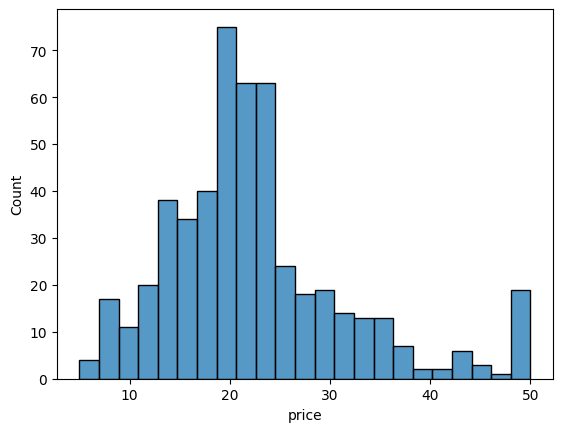

<Figure size 1000x600 with 0 Axes>

In [46]:
sns.histplot(data=hpd_df, x="price")
plt.figure(figsize=(10,6))

<Axes: >

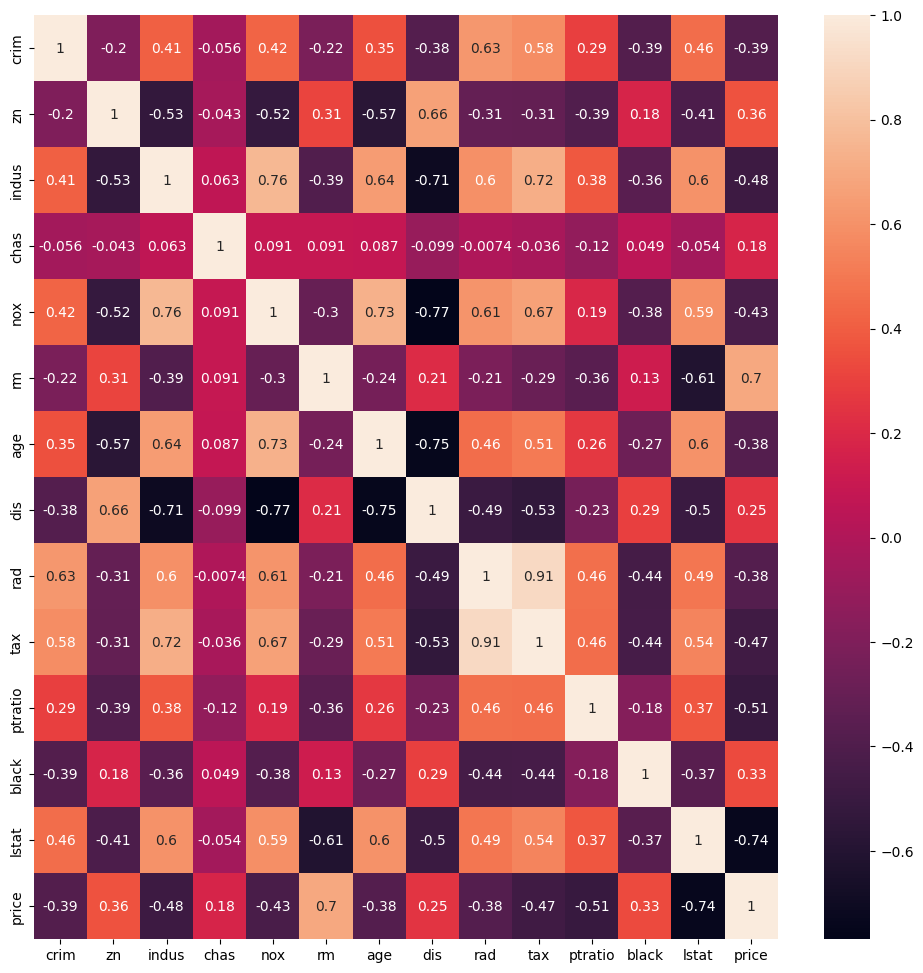

In [47]:
plt.figure(figsize=(12,12))
sns.heatmap(hpd_df.corr(), annot=True)

In [48]:
hpd_df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'price'],
      dtype='object')

### KFold 교차검증 데이터 준비

In [39]:
# x와 y 데이터 쪼갬 
X_df = hpd_df.drop('price', axis=1)
y = hpd_df['price'] 
X_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [40]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [44]:
# K-fold 교차검증을 위해서 numpy 2d로 변경
X = X_df.values
print(type(X))
X[:2]

<class 'numpy.ndarray'>


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [45]:
from sklearn.model_selection import KFold

num_split = 5
# n_splits : validation split 갯수
# 매개변수 : shuffle = True, random_state = 40 
# kf = KFold(n_splits=num_split)  
kf = KFold(n_splits=num_split, shuffle = True, random_state = 40)  

tot_MSE = 0.0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 선형회귀(Linear Regression) 모델 객체 선언하기
    model_lr = LinearRegression()

    # 선형회귀(Linear Regression) 모델 학습하기
    model_lr.fit(X_train, y_train)

    # 테스트 데이터에 대한 예측을 수행하기
    y_pred = model_lr.predict(X_test)

    # MSE(Mean Squared Error) 합산
    tot_MSE = tot_MSE + mean_squared_error(y_test, y_pred);

# 평균 MSE 계산 (total_MSE / KF-split갯수)
MSE = tot_MSE / num_split
RMSE = np.sqrt(MSE)
print('MSE : {0:.5f}'.format(MSE))
print('RMSE : {0:.5f}'.format(RMSE))

MSE : 23.99167
RMSE : 4.89813


In [51]:
print('회귀 계수 : ', np.round(model_lr.coef_, 2))
#print('회귀 계수 : ', model_lr.coef_, 2)
print('절편 값 : ', model_lr.intercept_)

회귀 계수 :  [-1.100e-01  5.000e-02  3.000e-02  3.300e+00 -1.637e+01  3.520e+00
  2.000e-02 -1.410e+00  3.000e-01 -1.000e-02 -9.000e-01  1.000e-02
 -6.400e-01]
절편 값 :  35.83791262574276


In [52]:
X_df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

<Axes: >

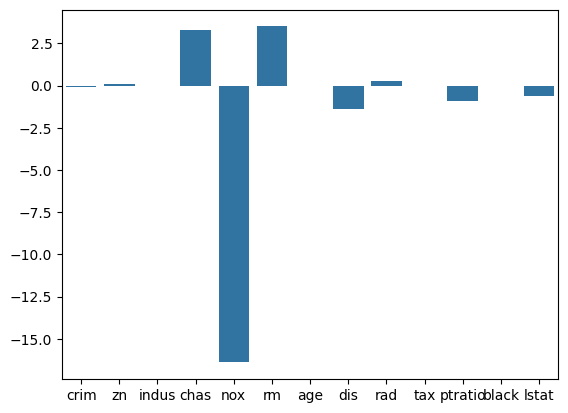

In [53]:
# 피처별 회귀 계수 값 확인, 시각화
coff = pd.Series(data=np.round(model_lr.coef_,1), index=X_df.columns)
coff.sort_values(ascending=False)
sns.barplot(coff)

## 유의미한 데이터 추출
### Feature Selection - 상관분석(Correlation Analysis)

In [54]:
columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'price']
hpd_df = pd.read_csv('./data/bostton_house_prices.csv', header=None, delimiter=r'\s+', names=columns)
hpd_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [55]:
corr = hpd_df.corr()

<Axes: >

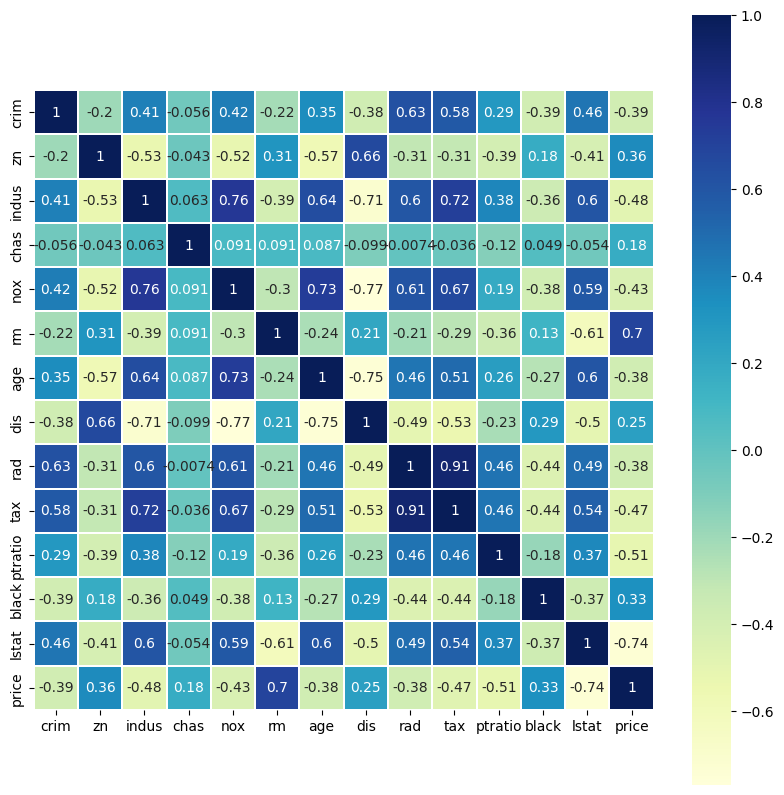

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, linewidths=0.01, square=True, annot=True, cmap='YlGnBu')

### 2x4 subplots을 이요해 price와 각 피처간의 산점도와 회귀선 확인

In [59]:
hpd_df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'price'],
      dtype='object')

### KFold 교차 검증, 학습모델, 성능평가
KFold 교차검증 원리
- KFold 교차검증 참고

In [60]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[5, 6], [7, 8], [9, 10], [11, 12]])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8])
kf = KFold(n_splits=4)
kf.get_n_splits(X)

print(kf)

KFold(n_splits=4, random_state=None, shuffle=False)


In [61]:
KFold(n_splits=4, random_state=None, shuffle=False)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[2 3 4 5 6 7]
  Test:  index=[0 1]
Fold 1:
  Train: index=[0 1 4 5 6 7]
  Test:  index=[2 3]
Fold 2:
  Train: index=[0 1 2 3 6 7]
  Test:  index=[4 5]
Fold 3:
  Train: index=[0 1 2 3 4 5]
  Test:  index=[6 7]


In [62]:
X_df = hpd_df.drop('price', axis=1)
y = hpd_df['price']

In [63]:
X_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [64]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [65]:
# K-fold 교차검증을 위해서 numpy 2d로 변경
X = X_df.values
print(type(X))
X[:2]

<class 'numpy.ndarray'>


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [66]:
from sklearn.model_selection import KFold

num_split = 5
# n_splits : validation split 갯수
# 매개변수 : shuffle = True, random_state = 40 
# kf = KFold(n_splits=num_split)  
kf = KFold(n_splits=num_split, shuffle = True, random_state = 40)  

tot_MSE = 0.0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 선형회귀(Linear Regression) 모델 객체 선언하기
    model_lr = LinearRegression()

    # 선형회귀(Linear Regression) 모델 학습하기
    model_lr.fit(X_train, y_train)

    # 테스트 데이터에 대한 예측을 수행하기
    y_pred = model_lr.predict(X_test)

    # MSE(Mean Squared Error) 합산
    tot_MSE = tot_MSE + mean_squared_error(y_test, y_pred);

# 평균 MSE 계산 (total_MSE / KF-split갯수)
MSE = tot_MSE / num_split
RMSE = np.sqrt(MSE)
print('MSE : {0:.5f}'.format(MSE))
print('RMSE : {0:.5f}'.format(RMSE))

MSE : 23.99167
RMSE : 4.89813


In [67]:
print('회귀 계수 : ', np.round(model_lr.coef_, 2))
# print('회귀 계수 : ', model_lr.coef_, 2)
print('절편 값 : ', model_lr.intercept_)

회귀 계수 :  [-1.100e-01  5.000e-02  3.000e-02  3.300e+00 -1.637e+01  3.520e+00
  2.000e-02 -1.410e+00  3.000e-01 -1.000e-02 -9.000e-01  1.000e-02
 -6.400e-01]
절편 값 :  35.83791262574276


In [68]:
X_df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

<Axes: >

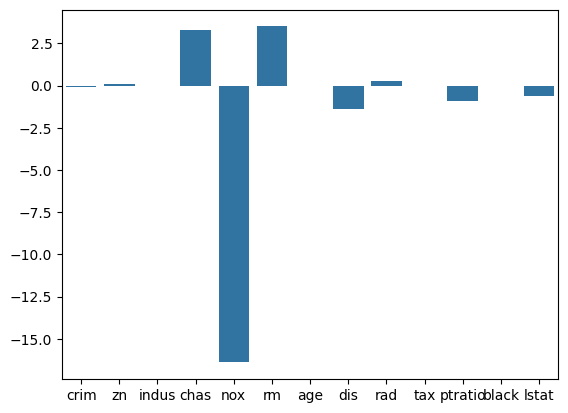

In [69]:
# 피처별 회귀 계수 값 확인, 시각화
coff = pd.Series(data=np.round(model_lr.coef_,1), index=X_df.columns)
coff.sort_values(ascending=False)
sns.barplot(coff)

In [70]:
columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'price']
hpd_df = pd.read_csv('./data/bostton_house_prices.csv', header=None, delimiter=r'\s+', names=columns)
hpd_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [71]:
corr = hpd_df.corr()

<Axes: >

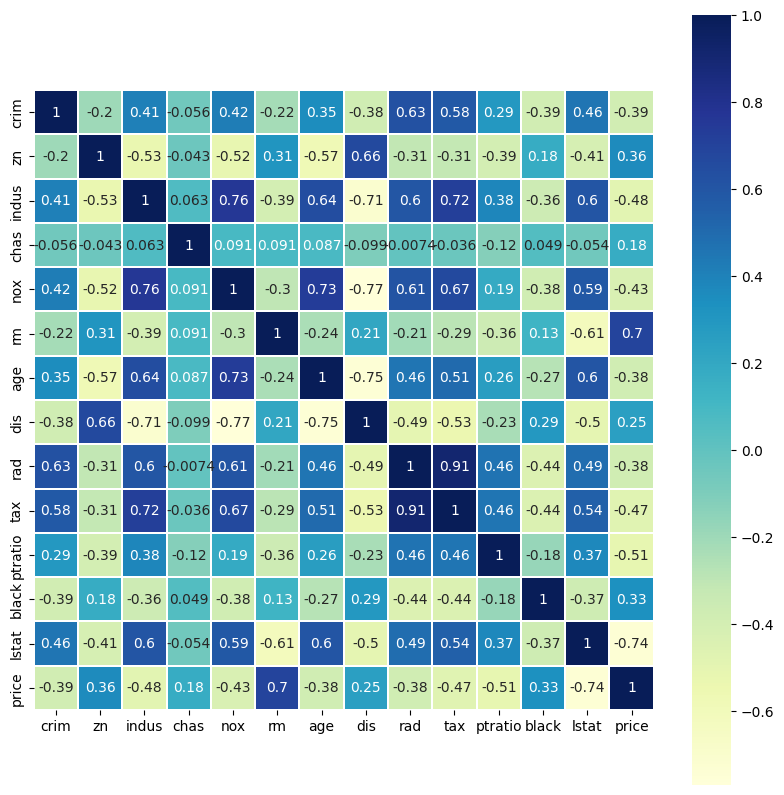

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, linewidths=0.01, square=True, annot=True, cmap='YlGnBu')

In [73]:
X = hpd_df.drop('price', axis=1)
y = hpd_df['price']

In [74]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

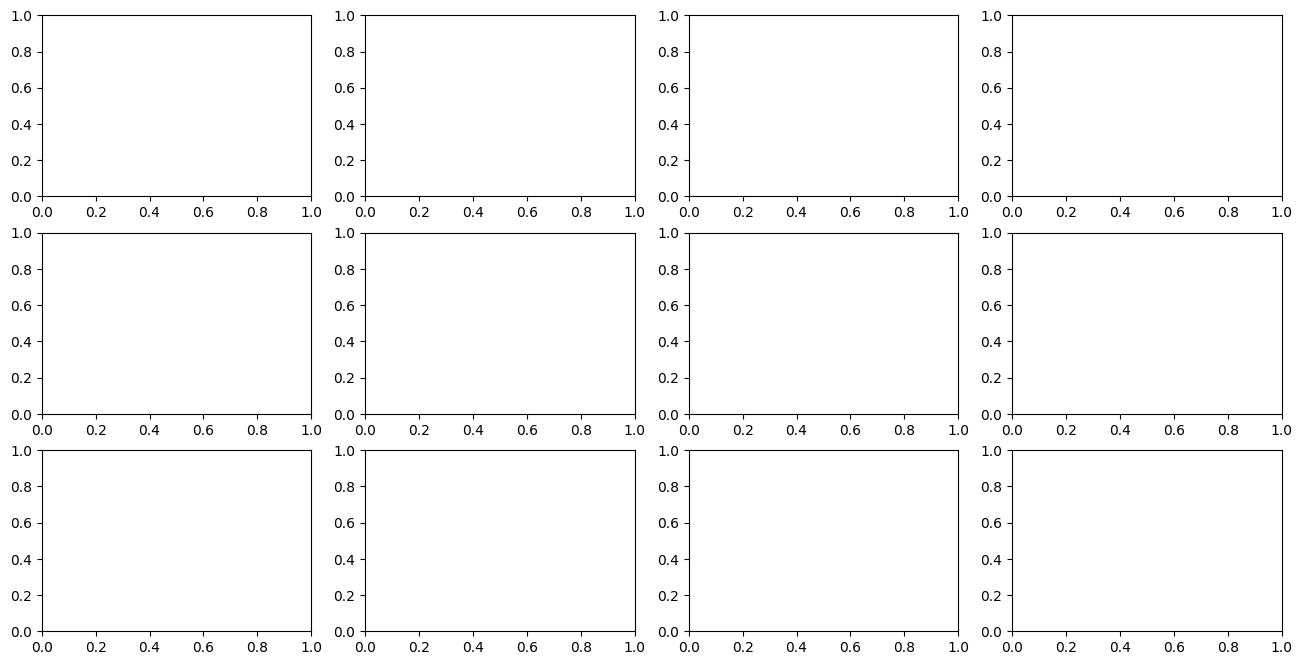

In [75]:
fig, axs = plt.subplots(figsize=[16,8], nrows=3, ncols=4)
features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']

axs = axs.flatten() # 3*4 2D -> 1D 변경
axs

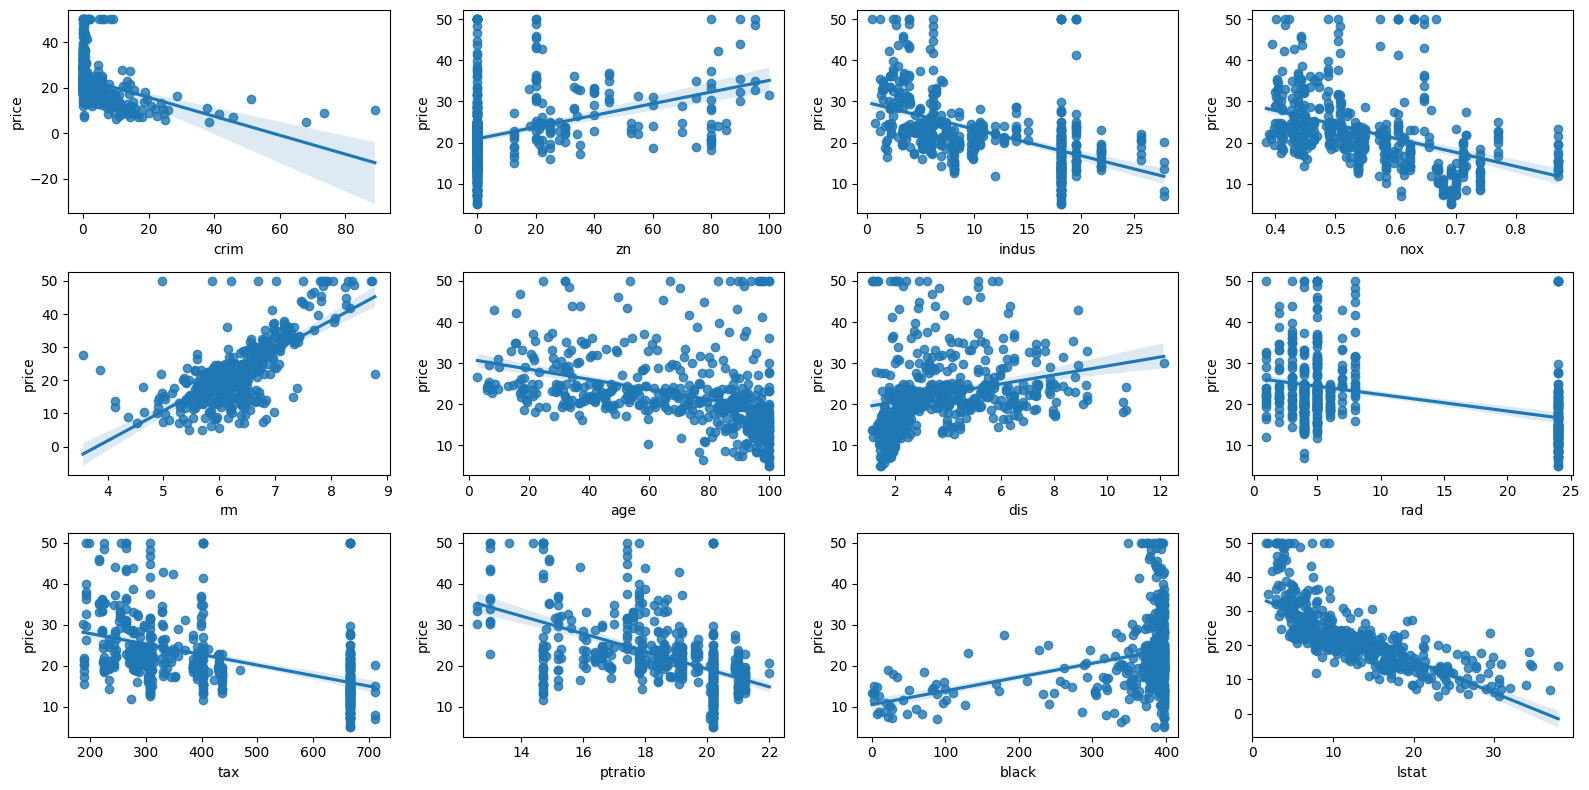

In [76]:
fig, axs = plt.subplots(figsize=[16,8], nrows=3, ncols=4)
features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']

axs = axs.flatten() # 3*4 2D -> 1D 변경
for i, feature in enumerate(features):
    sns.regplot(data=hpd_df, x=feature, y='price', ax=axs[i])
    
plt.tight_layout() # 레이아웃 자동조절
plt.show()

In [77]:
print(type(corr))
corr.head()

<class 'pandas.core.frame.DataFrame'>


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


In [78]:
# price와 상관관계가 유의미한 것만 추출
corr.query("price > 0.5 or price < -0.5").index.values.tolist()

['rm', 'ptratio', 'lstat', 'price']

In [79]:
# corr의 값이  price > 0.4 또는 price < -0.4작은 feature list 추출
useful_feature_list = corr.query("price > 0.5 or price < -0.5").index.values.tolist()
useful_feature_list.remove('price')
print(useful_feature_list)

['rm', 'ptratio', 'lstat']


In [80]:
hpd_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [81]:
X = hpd_df.loc[:,useful_feature_list].values
y = hpd_df.iloc[:,-1].values

In [82]:
# feature
X[:2]

array([[ 6.575, 15.3  ,  4.98 ],
       [ 6.421, 17.8  ,  9.14 ]])

In [83]:
# target
y[:2]

array([24. , 21.6])

In [84]:
print(X.shape)
print(y.shape)

(506, 3)
(506,)


In [85]:
useful_feature_list

['rm', 'ptratio', 'lstat']

In [86]:
# 제거된 컬럼 확인해 봄
print(list(set(hpd_df.columns) - set(useful_feature_list)))

['crim', 'age', 'zn', 'tax', 'nox', 'indus', 'dis', 'rad', 'price', 'chas', 'black']


In [87]:
num_split = 5
# n_splits : validation split 갯수
# 매개변수 : shuffle = True, random_state = 40 
# kf = KFold(n_splits=num_split)  
kf = KFold(n_splits=num_split, shuffle = True, random_state = 40)  

tot_MSE = 0.0

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 선형회귀(Linear Regression) 모델 선언하기
    model_lr = LinearRegression()

    # 선형회귀(Linear Regression) 모델 학습하기
    model_lr.fit(X_train, y_train)

    # 테스트 데이터에 대한 예측을 수행함
    y_pred = model_lr.predict(X_test)

    # MSE(Mean Squared Error) 합산 수행
    tot_MSE = tot_MSE + mean_squared_error(y_test, y_pred)

# 평균 MSE 계산 (total_MSE / KF-split갯수)
MSE = tot_MSE / num_split
RMSE = np.sqrt(MSE)
print('MSE : {0:.5f}'.format(MSE))
print('RMSE : {0:.5f}'.format(RMSE))

MSE : 27.79721
RMSE : 5.27231


### 문제해결하기 

In [88]:
# corr의 값이  price > 0.3 거나 price < -0.3작은 feature list 추출
useful_feature_list = corr.query("price > 0.3 or price < -0.3").index.values.tolist()
useful_feature_list.remove('price')
print(useful_feature_list)
X = hpd_df.loc[:,useful_feature_list].values
y = hpd_df.iloc[:,-1].values

['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'rad', 'tax', 'ptratio', 'black', 'lstat']


In [89]:
useful_feature_list

['crim',
 'zn',
 'indus',
 'nox',
 'rm',
 'age',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

In [90]:
# 제거된 컬럼 확인해 봄
removed_column_list = list(set(hpd_df.columns) - set(useful_feature_list))
print(removed_column_list)

['price', 'chas', 'dis']


In [91]:
# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2024)

# K-Fold 교차검증 실행
from sklearn.model_selection import cross_val_score   # KF 검증 함수
from sklearn.model_selection import KFold

num_split = 5
# n_splits : validation split 갯수
# 매개변수 추가해보기 : shuffle = True, random_state = 2024 
# kf = KFold(n_splits=num_split)

kf = KFold(n_splits=num_split, shuffle = True, random_state = 2024)  

tot_MSE = 0.0

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 선형회귀(Linear Regression) 모델 선언하기
    model_lr = LinearRegression()

    # 선형회귀(Linear Regression) 모델 학습하기
    model_lr.fit(X_train, y_train)

    # 테스트 데이터에 대한 예측을 수행함
    y_pred = model_lr.predict(X_test)

    # MSE(Mean Squared Error) 합산 수행
    tot_MSE = tot_MSE + mean_squared_error(y_test, y_pred)

# 평균 MSE 계산 (total_MSE / KF-split갯수)
MSE = tot_MSE / num_split
RMSE = np.sqrt(MSE)
x

print('MSE : {0:.5f}'.format(MSE))
print('RMSE : {0:.5f}'.format(RMSE))

MSE : 27.18709
RMSE : 5.21412


In [93]:
# X_test 데이터로 y^ 계산
y_pred =  model_lr.predict(X_test)

In [95]:
MSE = tot_MSE / num_split
RMSE = np.sqrt(MSE)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))

MSE : 27.18709, RMSE : 5.21412


In [96]:
from sklearn.metrics import r2_score
r2_model_lr = r2_score(y_test, y_pred)

In [97]:
r2_model_lr

0.6931597685255304

## XGBoost Regressor

In [99]:
from xgboost import XGBRegressor
xgb_rl = XGBRegressor()

xgb_rl.fit(X_train, y_train)
y_pred = xgb_rl.predict(X_test)

In [100]:
# MSE, RMSE 평가
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))

MSE : 8.99733, RMSE : 2.99955


In [101]:
r2_model_xgb = r2_score(y_test, y_pred)
r2_model_xgb

0.859704162495706